In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df_halueval = pd.read_excel('generated_output_halueval_annotated.xlsx')
df_drop = pd.read_excel('generated_output_drop_annotated.xlsx')
df_covid = pd.read_excel('generated_output_covid_annotated.xlsx')
df_finance = pd.read_excel('generated_output_financebench_annotated.xlsx')
df_ragtruth = pd.read_excel('generated_output_ragtruth_annotated.xlsx')
df_pubmed = pd.read_excel('generated_output_pubmed_annotated.xlsx')

In [31]:
def calculate_rag_metrics(scores):
    """
    Calculate metrics for RAG evaluation based on manual annotations
    scores: list/array of scores where:
        0 = wrong predictions (hallucinations)
        1 = correct predictions
        2 = insufficient context
    """
    total_samples = len(scores)

    # Calculate basic counts
    wrong_preds = sum(1 for score in scores if score == 0)
    correct_preds = sum(1 for score in scores if score == 1)
    insufficient_context = sum(1 for score in scores if score == 2)

    metrics = {
        # Percentage of correct predictions out of all samples
        'accuracy': (correct_preds / total_samples) * 100,

        # Percentage of wrong predictions (hallucination rate)
        'hallucination_rate': (wrong_preds / total_samples) * 100,

        # Percentage of cases with insufficient context
        'insufficient_context_rate': (insufficient_context / total_samples) * 100,

        # Accuracy excluding insufficient context cases
        'adjusted_accuracy': (correct_preds / (correct_preds + wrong_preds)) * 100 if (correct_preds + wrong_preds) > 0 else 0
    }

    return metrics

def compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores):
    """
    Compare metrics across different retrievers
    """
    results = {
        'Synthetic': calculate_rag_metrics(synthetic_scores),
        'Semantic': calculate_rag_metrics(semantic_scores),
        'Hybrid': calculate_rag_metrics(hybrid_scores)
    }
    return results

def plot_results(results):
    """
    Create visualizations for the metrics
    """
    # Convert results to DataFrame for easier plotting
    df = pd.DataFrame(results).round(2)

    # Create a bar plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('RAG Metrics Comparison', fontsize=16)

    metrics = ['accuracy', 'hallucination_rate', 'insufficient_context_rate', 'adjusted_accuracy']
    for idx, metric in enumerate(metrics):
        ax = axes[idx//2, idx%2]
        df.loc[metric].plot(kind='bar', ax=ax)
        ax.set_title(f'{metric.replace("_", " ").title()} (%)')
        ax.set_ylabel('Percentage')
        ax.set_xlabel('Retriever Type')

    plt.tight_layout()
    plt.show()


Detailed Results:
--------------------------------------------------

Synthetic Retriever:
Accuracy: 56.00%
Hallucination Rate: 22.00%
Insufficient Context Rate: 22.00%
Adjusted Accuracy: 71.79%

Semantic Retriever:
Accuracy: 64.00%
Hallucination Rate: 22.00%
Insufficient Context Rate: 14.00%
Adjusted Accuracy: 74.42%

Hybrid Retriever:
Accuracy: 92.00%
Hallucination Rate: 6.00%
Insufficient Context Rate: 2.00%
Adjusted Accuracy: 93.88%


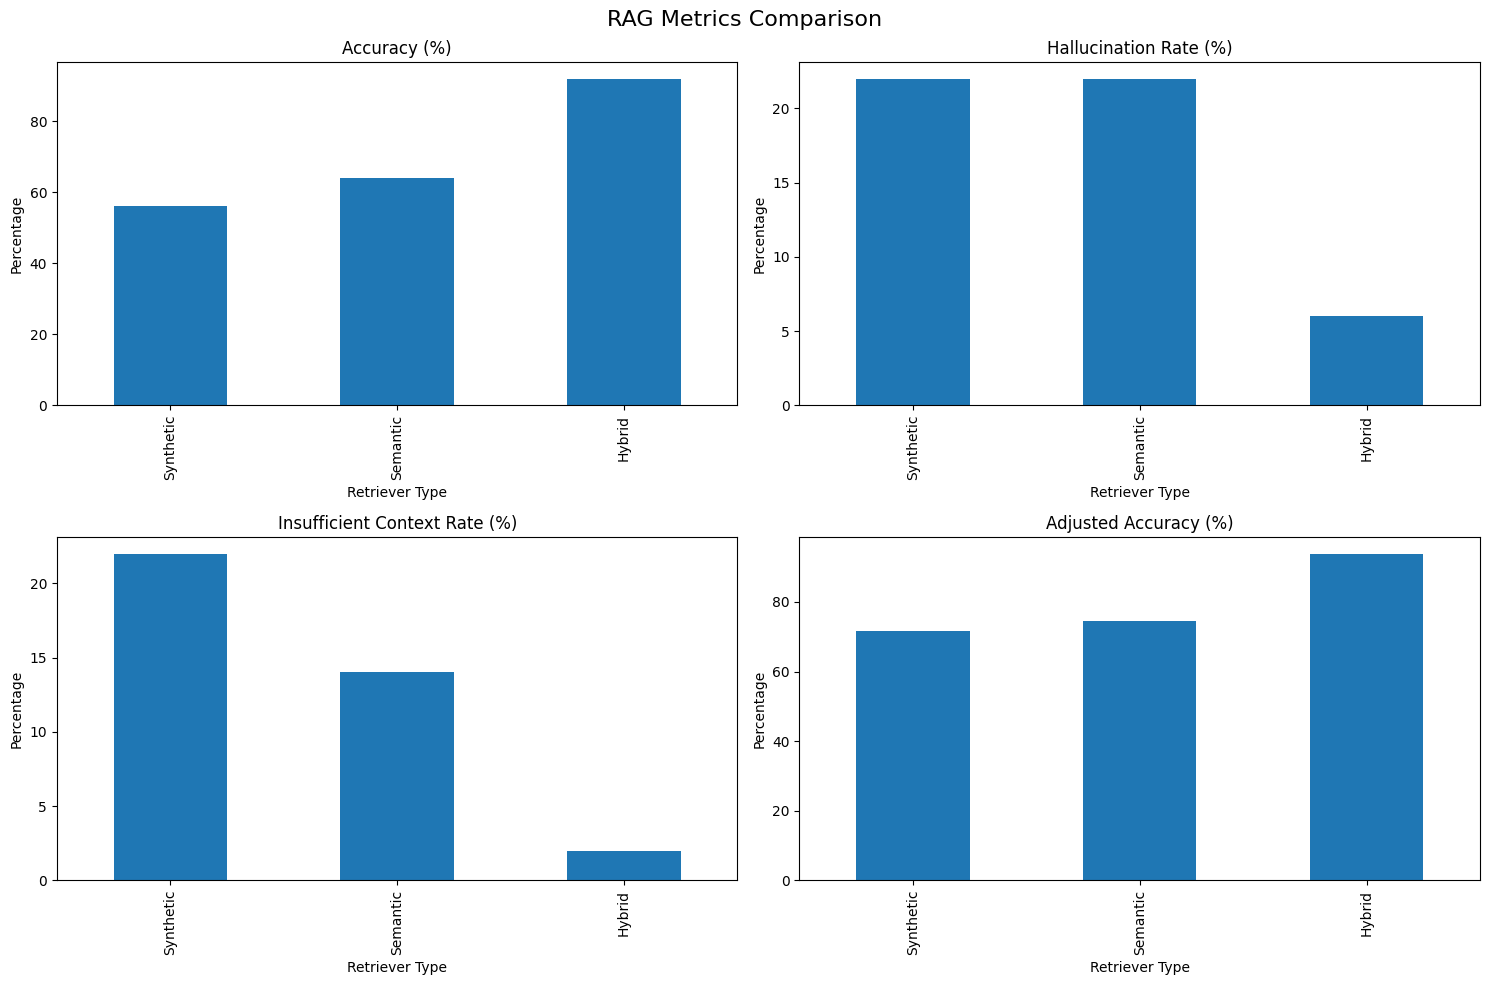


Summary DataFrame:
                           Synthetic  Semantic  Hybrid
accuracy                       56.00     64.00   92.00
hallucination_rate             22.00     22.00    6.00
insufficient_context_rate      22.00     14.00    2.00
adjusted_accuracy              71.79     74.42   93.88


In [32]:
# HaluEval Dataset
synthetic_scores = df_halueval['bm25_score']  
semantic_scores = df_halueval['semantic_score']  
hybrid_scores = df_halueval['hybrid_score']   

# Calculate and display results
results = compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores)

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for retriever, metrics in results.items():
    print(f"\n{retriever} Retriever:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")

# Plot the results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame(results).round(2)
print("\nSummary DataFrame:")
print(summary_df)


Detailed Results:
--------------------------------------------------

Synthetic Retriever:
Accuracy: 30.61%
Hallucination Rate: 48.98%
Insufficient Context Rate: 20.41%
Adjusted Accuracy: 38.46%

Semantic Retriever:
Accuracy: 48.98%
Hallucination Rate: 38.78%
Insufficient Context Rate: 12.24%
Adjusted Accuracy: 55.81%

Hybrid Retriever:
Accuracy: 77.55%
Hallucination Rate: 14.29%
Insufficient Context Rate: 8.16%
Adjusted Accuracy: 84.44%


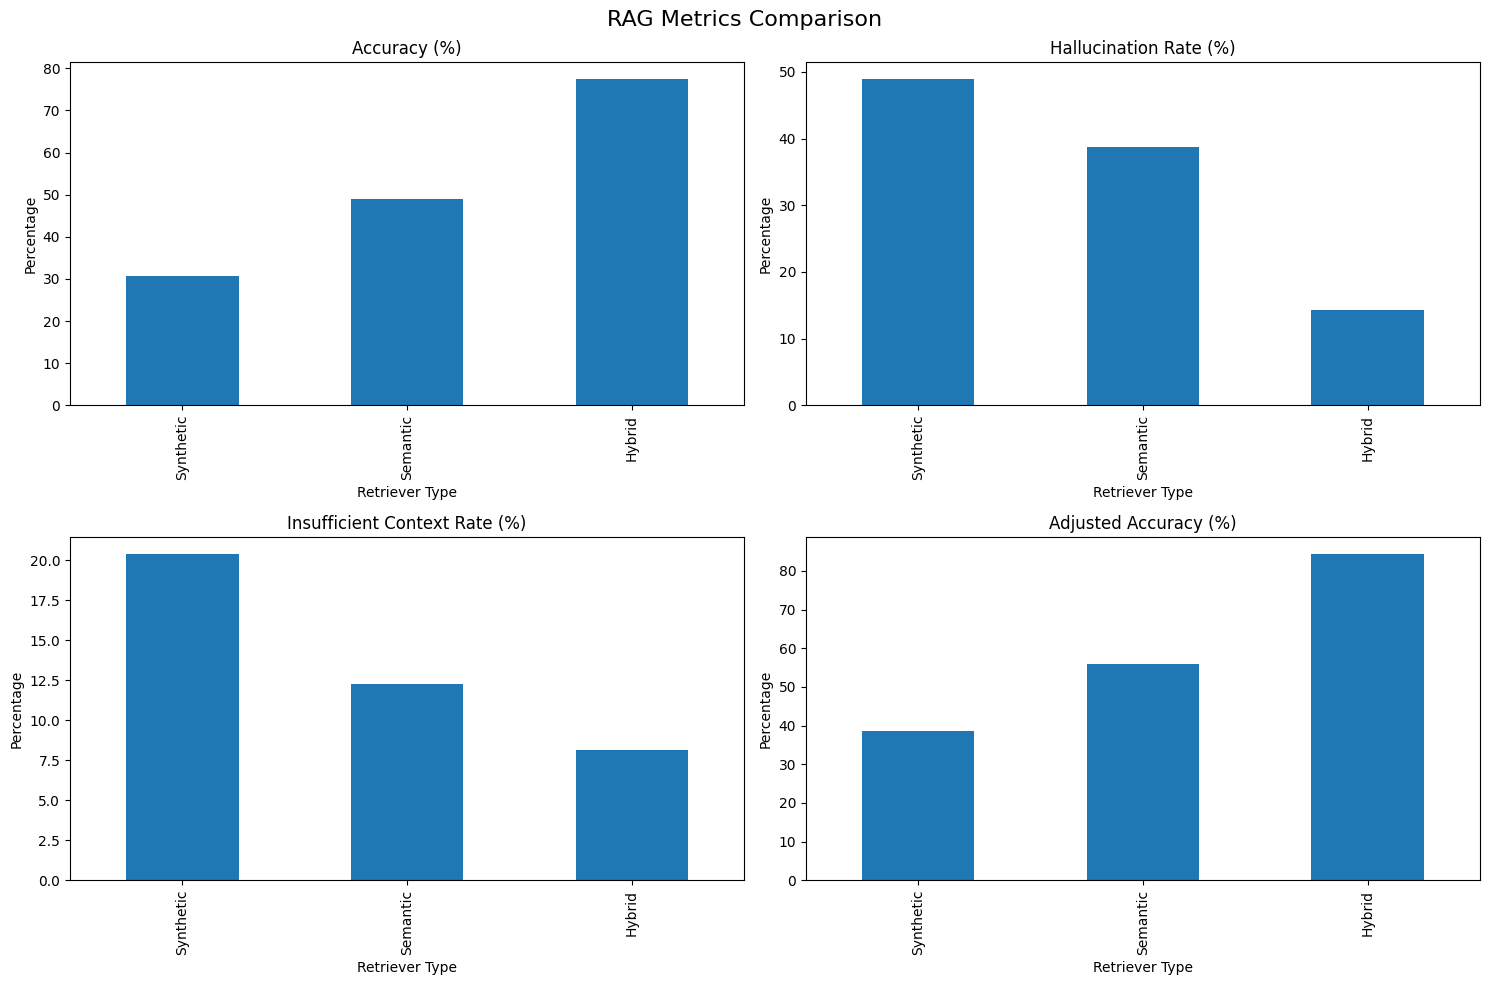


Summary DataFrame:
                           Synthetic  Semantic  Hybrid
accuracy                       30.61     48.98   77.55
hallucination_rate             48.98     38.78   14.29
insufficient_context_rate      20.41     12.24    8.16
adjusted_accuracy              38.46     55.81   84.44


In [33]:
# Drop dataset
synthetic_scores = df_drop['bm25_score']  
semantic_scores = df_drop['semantic_score']  
hybrid_scores = df_drop['hybrid_score']   

# Calculate and display results
results = compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores)

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for retriever, metrics in results.items():
    print(f"\n{retriever} Retriever:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")

# Plot the results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame(results).round(2)
print("\nSummary DataFrame:")
print(summary_df)


Detailed Results:
--------------------------------------------------

Synthetic Retriever:
Accuracy: 30.00%
Hallucination Rate: 20.00%
Insufficient Context Rate: 50.00%
Adjusted Accuracy: 60.00%

Semantic Retriever:
Accuracy: 14.00%
Hallucination Rate: 58.00%
Insufficient Context Rate: 28.00%
Adjusted Accuracy: 19.44%

Hybrid Retriever:
Accuracy: 70.00%
Hallucination Rate: 22.00%
Insufficient Context Rate: 8.00%
Adjusted Accuracy: 76.09%


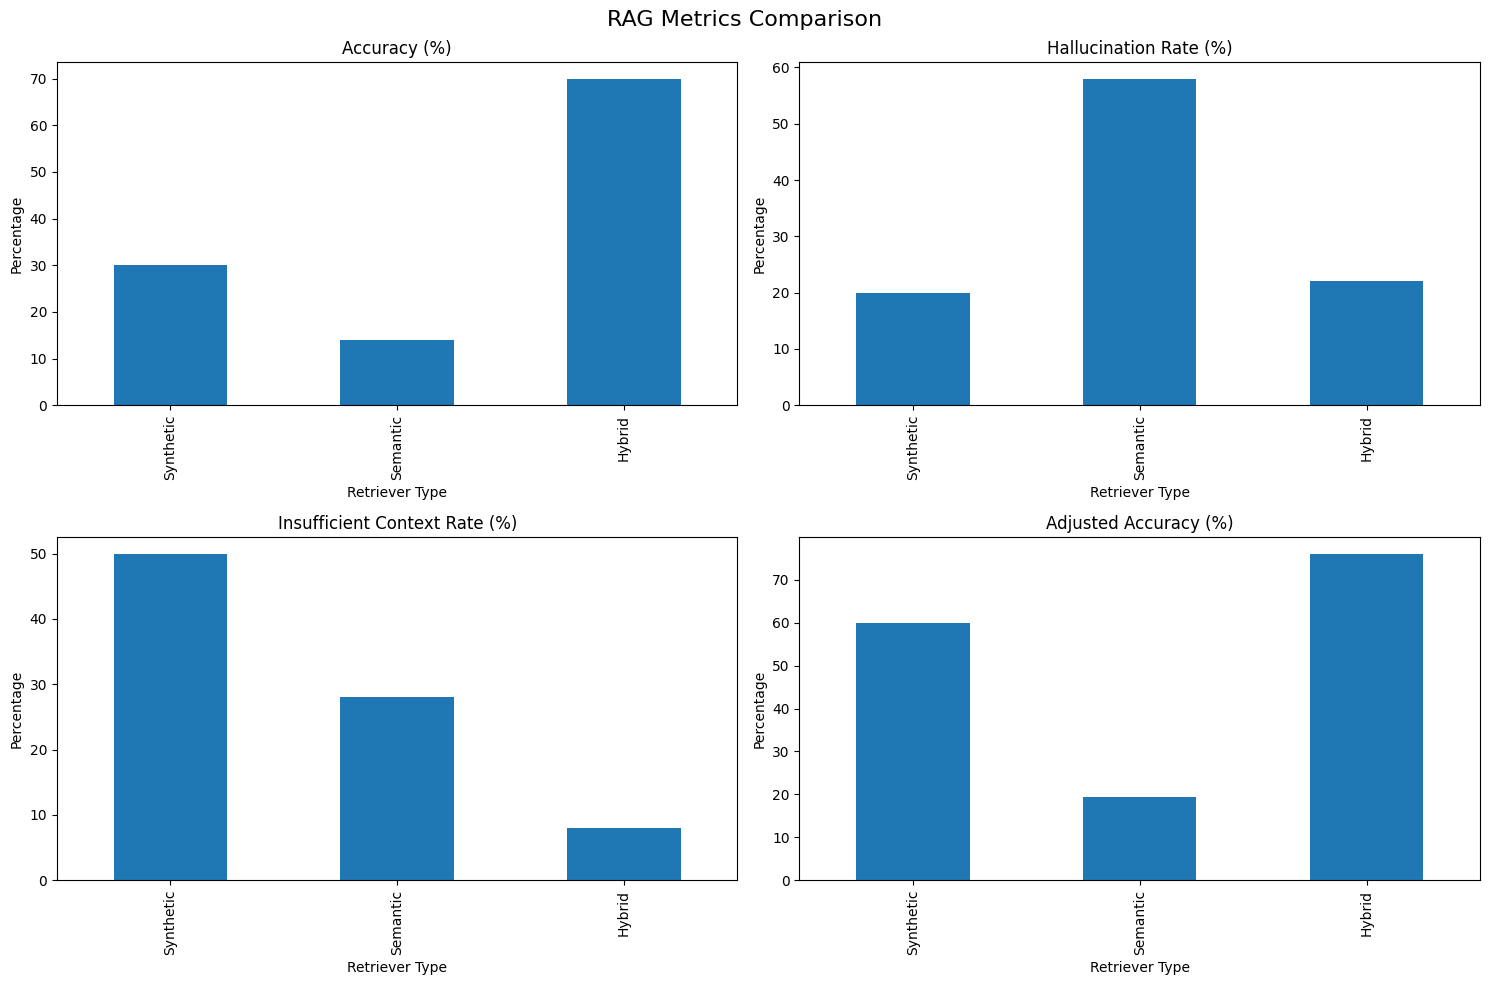


Summary DataFrame:
                           Synthetic  Semantic  Hybrid
accuracy                        30.0     14.00   70.00
hallucination_rate              20.0     58.00   22.00
insufficient_context_rate       50.0     28.00    8.00
adjusted_accuracy               60.0     19.44   76.09


In [34]:
# CovidQA dataset
synthetic_scores = df_covid['bm25_score'] 
semantic_scores = df_covid['semantic_score']   
hybrid_scores = df_covid['hybrid_score']    

# Calculate and display results
results = compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores)

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for retriever, metrics in results.items():
    print(f"\n{retriever} Retriever:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")

# Plot the results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame(results).round(2)
print("\nSummary DataFrame:")
print(summary_df)


Detailed Results:
--------------------------------------------------

Synthetic Retriever:
Accuracy: 8.00%
Hallucination Rate: 8.00%
Insufficient Context Rate: 84.00%
Adjusted Accuracy: 50.00%

Semantic Retriever:
Accuracy: 26.00%
Hallucination Rate: 24.00%
Insufficient Context Rate: 50.00%
Adjusted Accuracy: 52.00%

Hybrid Retriever:
Accuracy: 62.00%
Hallucination Rate: 6.00%
Insufficient Context Rate: 32.00%
Adjusted Accuracy: 91.18%


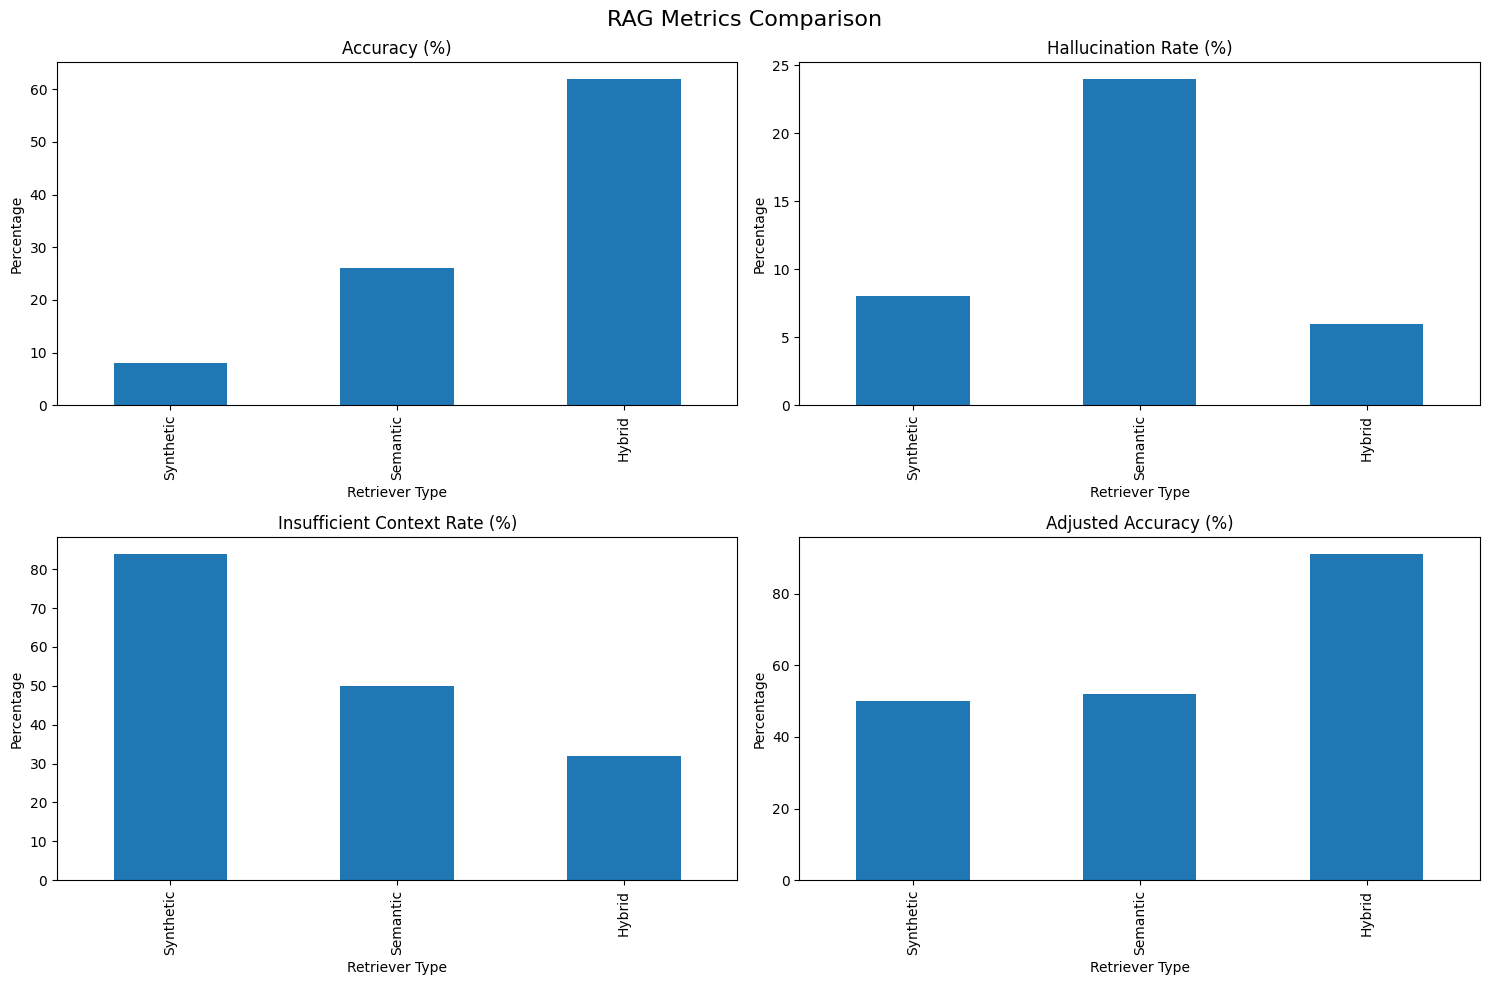


Summary DataFrame:
                           Synthetic  Semantic  Hybrid
accuracy                         8.0      26.0   62.00
hallucination_rate               8.0      24.0    6.00
insufficient_context_rate       84.0      50.0   32.00
adjusted_accuracy               50.0      52.0   91.18


In [35]:
# FinanceBench dataset
synthetic_scores = df_finance['bm25_score'] 
semantic_scores = df_finance['semantic_score']  
hybrid_scores = df_finance['hybrid_score']    

# Calculate and display results
results = compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores)

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for retriever, metrics in results.items():
    print(f"\n{retriever} Retriever:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")

# Plot the results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame(results).round(2)
print("\nSummary DataFrame:")
print(summary_df)


Detailed Results:
--------------------------------------------------

Synthetic Retriever:
Accuracy: 68.00%
Hallucination Rate: 12.00%
Insufficient Context Rate: 20.00%
Adjusted Accuracy: 85.00%

Semantic Retriever:
Accuracy: 76.00%
Hallucination Rate: 10.00%
Insufficient Context Rate: 14.00%
Adjusted Accuracy: 88.37%

Hybrid Retriever:
Accuracy: 88.00%
Hallucination Rate: 4.00%
Insufficient Context Rate: 8.00%
Adjusted Accuracy: 95.65%


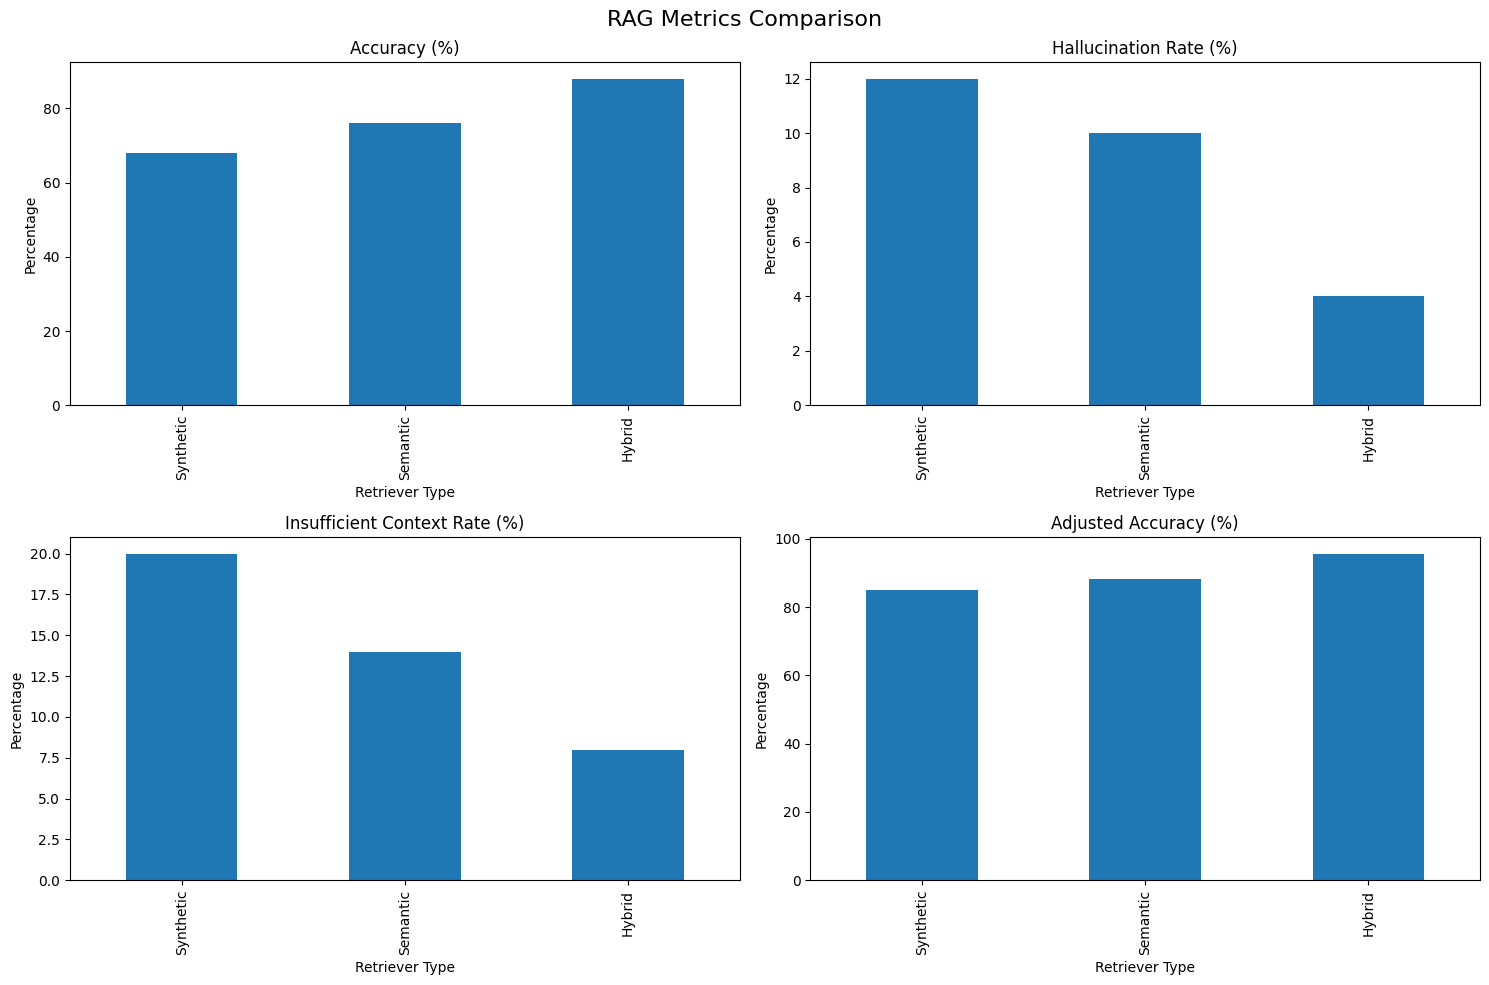


Summary DataFrame:
                           Synthetic  Semantic  Hybrid
accuracy                        68.0     76.00   88.00
hallucination_rate              12.0     10.00    4.00
insufficient_context_rate       20.0     14.00    8.00
adjusted_accuracy               85.0     88.37   95.65


In [36]:
# RagTruth dataset
synthetic_scores = df_ragtruth['bm25_score'] 
semantic_scores = df_ragtruth['semantic_score']  
hybrid_scores = df_ragtruth['hybrid_score']  

# Calculate and display results
results = compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores)

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for retriever, metrics in results.items():
    print(f"\n{retriever} Retriever:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")

# Plot the results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame(results).round(2)
print("\nSummary DataFrame:")
print(summary_df)


Detailed Results:
--------------------------------------------------

Synthetic Retriever:
Accuracy: 60.00%
Hallucination Rate: 16.00%
Insufficient Context Rate: 24.00%
Adjusted Accuracy: 78.95%

Semantic Retriever:
Accuracy: 66.00%
Hallucination Rate: 20.00%
Insufficient Context Rate: 14.00%
Adjusted Accuracy: 76.74%

Hybrid Retriever:
Accuracy: 92.00%
Hallucination Rate: 4.00%
Insufficient Context Rate: 4.00%
Adjusted Accuracy: 95.83%


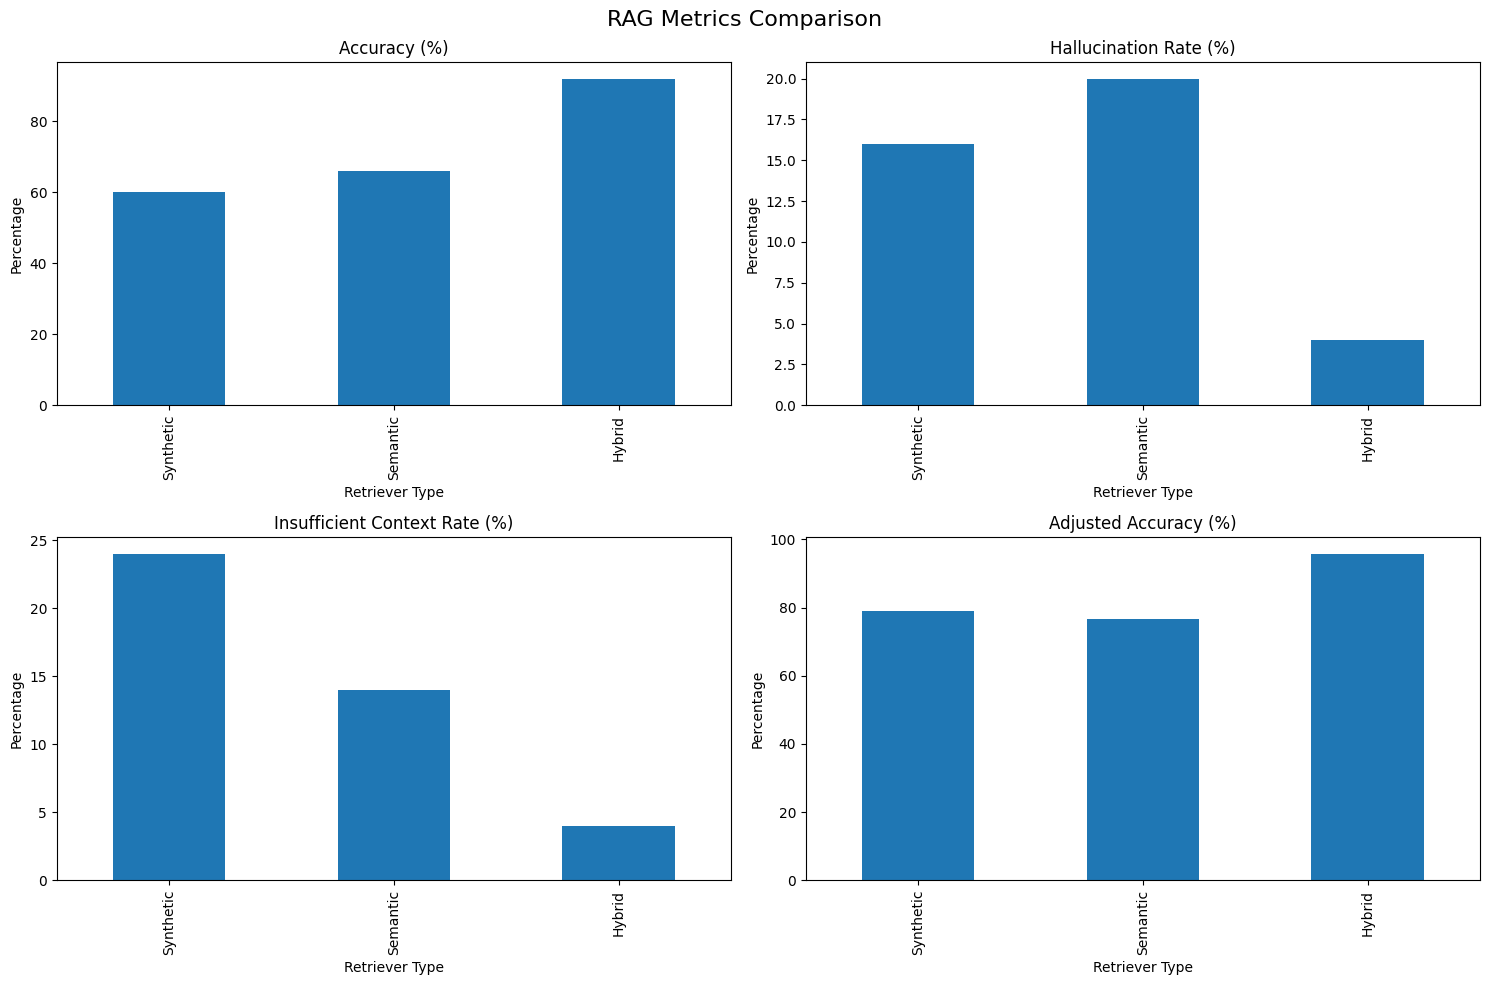


Summary DataFrame:
                           Synthetic  Semantic  Hybrid
accuracy                       60.00     66.00   92.00
hallucination_rate             16.00     20.00    4.00
insufficient_context_rate      24.00     14.00    4.00
adjusted_accuracy              78.95     76.74   95.83


In [37]:
# PubMed dataset    
synthetic_scores = df_pubmed['bm25_score'] 
semantic_scores = df_pubmed['semantic_score']  
hybrid_scores = df_pubmed['hybrid_score']   

# Calculate and display results
results = compare_retrievers(synthetic_scores, semantic_scores, hybrid_scores)

# Print detailed results
print("\nDetailed Results:")
print("-" * 50)
for retriever, metrics in results.items():
    print(f"\n{retriever} Retriever:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').title()}: {value:.2f}%")

# Plot the results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame(results).round(2)
print("\nSummary DataFrame:")
print(summary_df)

In [38]:
# Evaluate model performance on hallucinated samples (fail cases)

def evaluate_hallucinated_samples(df):
    """

    Parameters:
    df: DataFrame containing columns:
        - label: 'pass' or 'fail'
        - synthetic_score: scores for synthetic retriever (0,1,2)
        - semantic_score: scores for semantic retriever (0,1,2)
        - hybrid_score: scores for hybrid retriever (0,1,2)
    """
    # Filter only the fail cases (hallucinated samples)
    fail_samples = df[df['label'] == 'FAIL']
    total_fail_samples = len(fail_samples)

    # Calculate metrics for each retriever
    retrievers = {
        'Synthetic': 'bm25_score',
        'Semantic': 'semantic_score',
        'Hybrid': 'hybrid_score'
    }

    results = {}
    for retriever_name, score_column in retrievers.items():
        # Count different predictions
        correct_preds = sum(fail_samples[score_column] == 1)
        wrong_preds = sum(fail_samples[score_column] == 0)
        insufficient_context = sum(fail_samples[score_column] == 2)

        results[retriever_name] = {
            'total_fail_samples': total_fail_samples,
            'correct_predictions': correct_preds,
            'wrong_predictions': wrong_preds,
            'insufficient_context': insufficient_context,
            'accuracy_on_fails': (correct_preds / total_fail_samples) * 100,
            'error_rate': (wrong_preds / total_fail_samples) * 100,
            'insufficient_rate': (insufficient_context / total_fail_samples) * 100
        }

    return results

def print_results(results):
    """
    Print the results in a readable format
    """
    print("\nEvaluation Results for Hallucinated (Fail) Samples:")
    print("-" * 70)

    for retriever, metrics in results.items():
        print(f"\n{retriever} Retriever:")
        print(f"Total fail samples: {metrics['total_fail_samples']}")
        print(f"Correct predictions: {metrics['correct_predictions']} ({metrics['accuracy_on_fails']:.2f}%)")
        print(f"Wrong predictions: {metrics['wrong_predictions']} ({metrics['error_rate']:.2f}%)")
        print(f"Insufficient context: {metrics['insufficient_context']} ({metrics['insufficient_rate']:.2f}%)")
        print("-" * 50)

def plot_results(results):
    """
    Visualize the results
    """
    import matplotlib.pyplot as plt

    # Prepare data for plotting
    retrievers = list(results.keys())
    metrics = ['accuracy_on_fails', 'error_rate', 'insufficient_rate']

    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(retrievers))
    width = 0.25

    # Plot bars for each metric
    for i, metric in enumerate(metrics):
        values = [results[r][metric] for r in retrievers]
        ax.bar(x + i*width, values, width, 
               label=metric.replace('_', ' ').title())

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Performance on Hallucinated (Fail) Samples')
    ax.set_xticks(x + width)
    ax.set_xticklabels(retrievers)
    ax.legend()

    plt.tight_layout()
    plt.show()


Evaluation Results for Hallucinated (Fail) Samples:
----------------------------------------------------------------------

Synthetic Retriever:
Total fail samples: 25
Correct predictions: 11 (44.00%)
Wrong predictions: 8 (32.00%)
Insufficient context: 6 (24.00%)
--------------------------------------------------

Semantic Retriever:
Total fail samples: 25
Correct predictions: 12 (48.00%)
Wrong predictions: 7 (28.00%)
Insufficient context: 6 (24.00%)
--------------------------------------------------

Hybrid Retriever:
Total fail samples: 25
Correct predictions: 23 (92.00%)
Wrong predictions: 2 (8.00%)
Insufficient context: 0 (0.00%)
--------------------------------------------------


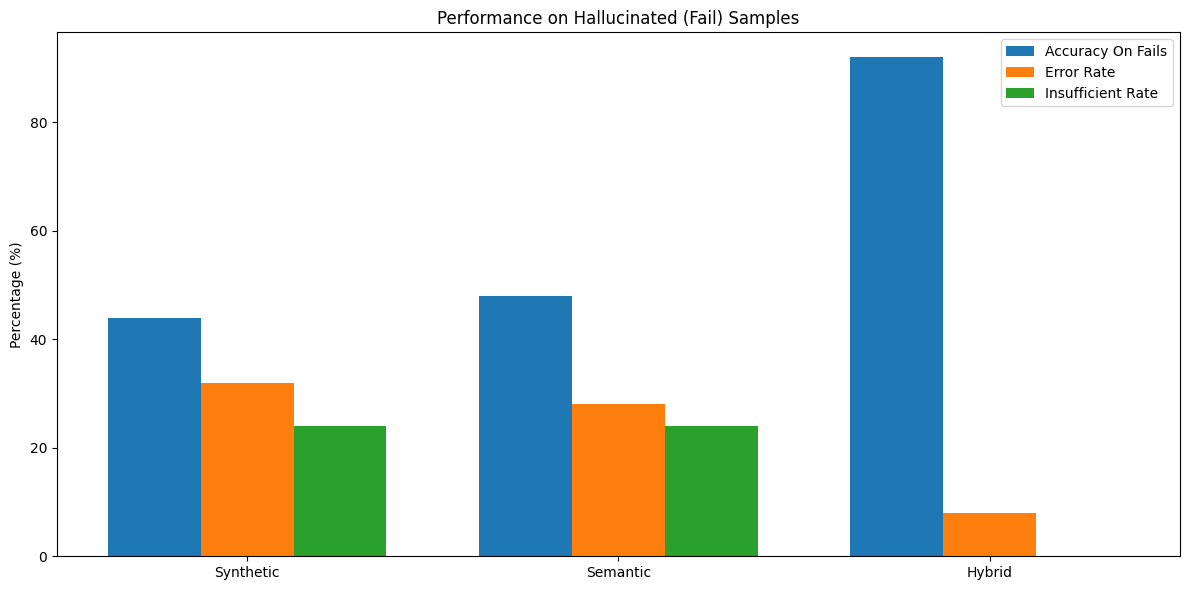


Summary DataFrame:
                          Synthetic  Semantic  Hybrid
Correct Predictions (%)        44.0      48.0    92.0
Wrong Predictions (%)          32.0      28.0     8.0
Insufficient Context (%)       24.0      24.0     0.0


In [39]:
# Calculate metrics
results = evaluate_hallucinated_samples(df_halueval)

# Print detailed results
print_results(results)

# Plot results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame({
    retriever: {
        'Correct Predictions (%)': metrics['accuracy_on_fails'],
        'Wrong Predictions (%)': metrics['error_rate'],
        'Insufficient Context (%)': metrics['insufficient_rate']
    }
    for retriever, metrics in results.items()
}).round(2)

print("\nSummary DataFrame:")
print(summary_df)


Evaluation Results for Hallucinated (Fail) Samples:
----------------------------------------------------------------------

Synthetic Retriever:
Total fail samples: 24
Correct predictions: 6 (25.00%)
Wrong predictions: 14 (58.33%)
Insufficient context: 4 (16.67%)
--------------------------------------------------

Semantic Retriever:
Total fail samples: 24
Correct predictions: 11 (45.83%)
Wrong predictions: 12 (50.00%)
Insufficient context: 1 (4.17%)
--------------------------------------------------

Hybrid Retriever:
Total fail samples: 24
Correct predictions: 17 (70.83%)
Wrong predictions: 5 (20.83%)
Insufficient context: 2 (8.33%)
--------------------------------------------------


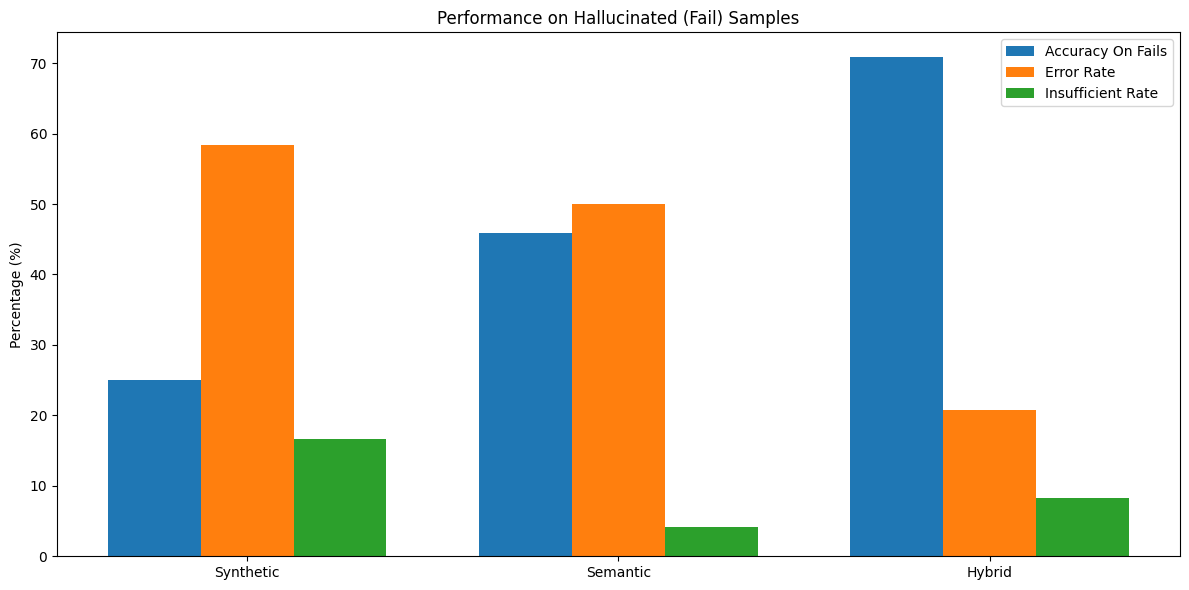


Summary DataFrame:
                          Synthetic  Semantic  Hybrid
Correct Predictions (%)       25.00     45.83   70.83
Wrong Predictions (%)         58.33     50.00   20.83
Insufficient Context (%)      16.67      4.17    8.33


In [40]:
# Calculate metrics
results = evaluate_hallucinated_samples(df_drop)

# Print detailed results
print_results(results)

# Plot results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame({
    retriever: {
        'Correct Predictions (%)': metrics['accuracy_on_fails'],
        'Wrong Predictions (%)': metrics['error_rate'],
        'Insufficient Context (%)': metrics['insufficient_rate']
    }
    for retriever, metrics in results.items()
}).round(2)

print("\nSummary DataFrame:")
print(summary_df)


Evaluation Results for Hallucinated (Fail) Samples:
----------------------------------------------------------------------

Synthetic Retriever:
Total fail samples: 24
Correct predictions: 10 (41.67%)
Wrong predictions: 5 (20.83%)
Insufficient context: 9 (37.50%)
--------------------------------------------------

Semantic Retriever:
Total fail samples: 24
Correct predictions: 4 (16.67%)
Wrong predictions: 14 (58.33%)
Insufficient context: 6 (25.00%)
--------------------------------------------------

Hybrid Retriever:
Total fail samples: 24
Correct predictions: 17 (70.83%)
Wrong predictions: 5 (20.83%)
Insufficient context: 2 (8.33%)
--------------------------------------------------


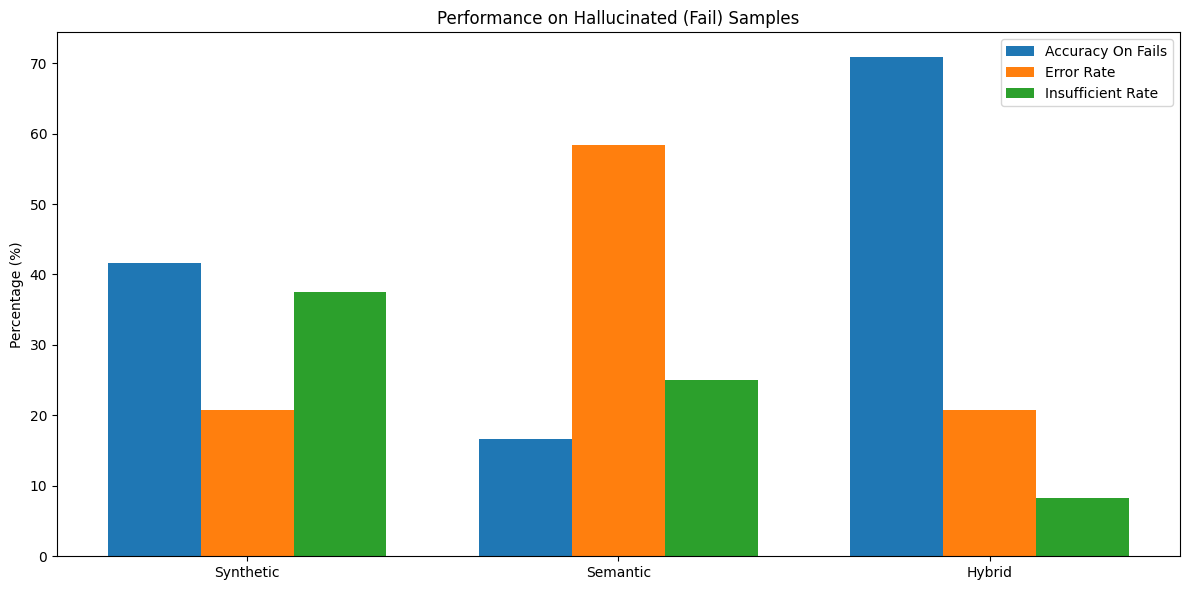


Summary DataFrame:
                          Synthetic  Semantic  Hybrid
Correct Predictions (%)       41.67     16.67   70.83
Wrong Predictions (%)         20.83     58.33   20.83
Insufficient Context (%)      37.50     25.00    8.33


In [41]:
# Calculate metrics
results = evaluate_hallucinated_samples(df_covid)

# Print detailed results
print_results(results)

# Plot results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame({
    retriever: {
        'Correct Predictions (%)': metrics['accuracy_on_fails'],
        'Wrong Predictions (%)': metrics['error_rate'],
        'Insufficient Context (%)': metrics['insufficient_rate']
    }
    for retriever, metrics in results.items()
}).round(2)

print("\nSummary DataFrame:")
print(summary_df)


Evaluation Results for Hallucinated (Fail) Samples:
----------------------------------------------------------------------

Synthetic Retriever:
Total fail samples: 25
Correct predictions: 3 (12.00%)
Wrong predictions: 2 (8.00%)
Insufficient context: 20 (80.00%)
--------------------------------------------------

Semantic Retriever:
Total fail samples: 25
Correct predictions: 7 (28.00%)
Wrong predictions: 6 (24.00%)
Insufficient context: 12 (48.00%)
--------------------------------------------------

Hybrid Retriever:
Total fail samples: 25
Correct predictions: 15 (60.00%)
Wrong predictions: 2 (8.00%)
Insufficient context: 8 (32.00%)
--------------------------------------------------


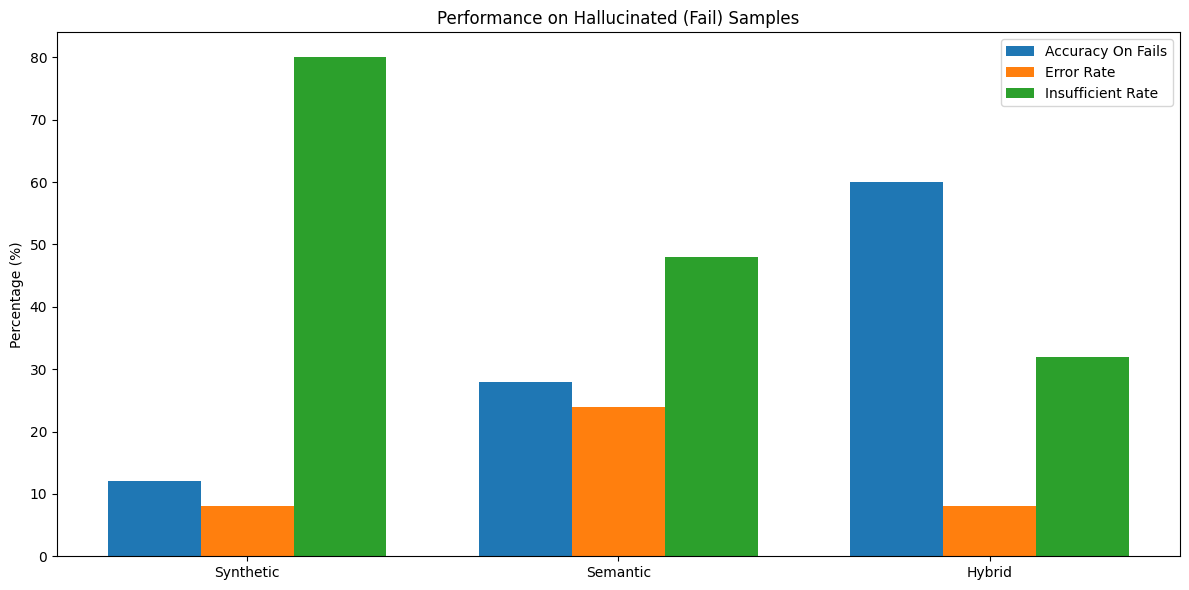


Summary DataFrame:
                          Synthetic  Semantic  Hybrid
Correct Predictions (%)        12.0      28.0    60.0
Wrong Predictions (%)           8.0      24.0     8.0
Insufficient Context (%)       80.0      48.0    32.0


In [42]:
# Calculate metrics
results = evaluate_hallucinated_samples(df_finance)

# Print detailed results
print_results(results)

# Plot results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame({
    retriever: {
        'Correct Predictions (%)': metrics['accuracy_on_fails'],
        'Wrong Predictions (%)': metrics['error_rate'],
        'Insufficient Context (%)': metrics['insufficient_rate']
    }
    for retriever, metrics in results.items()
}).round(2)

print("\nSummary DataFrame:")
print(summary_df)


Evaluation Results for Hallucinated (Fail) Samples:
----------------------------------------------------------------------

Synthetic Retriever:
Total fail samples: 25
Correct predictions: 11 (44.00%)
Wrong predictions: 4 (16.00%)
Insufficient context: 10 (40.00%)
--------------------------------------------------

Semantic Retriever:
Total fail samples: 25
Correct predictions: 14 (56.00%)
Wrong predictions: 7 (28.00%)
Insufficient context: 4 (16.00%)
--------------------------------------------------

Hybrid Retriever:
Total fail samples: 25
Correct predictions: 23 (92.00%)
Wrong predictions: 1 (4.00%)
Insufficient context: 1 (4.00%)
--------------------------------------------------


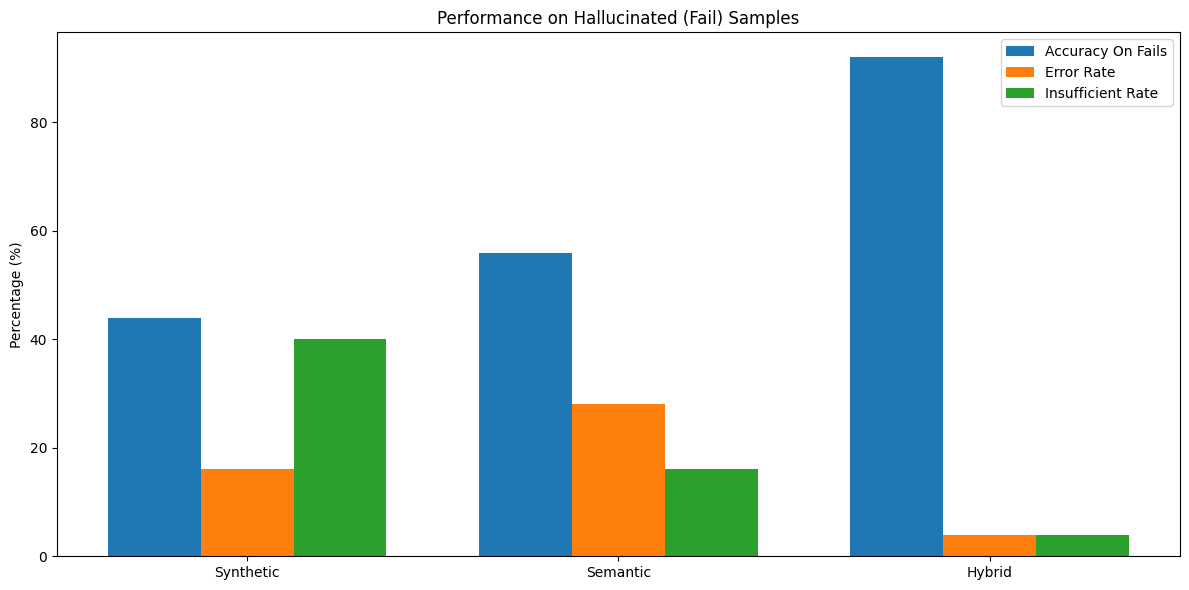


Summary DataFrame:
                          Synthetic  Semantic  Hybrid
Correct Predictions (%)        44.0      56.0    92.0
Wrong Predictions (%)          16.0      28.0     4.0
Insufficient Context (%)       40.0      16.0     4.0


In [43]:
# Calculate metrics
results = evaluate_hallucinated_samples(df_pubmed)

# Print detailed results
print_results(results)

# Plot results
plot_results(results)

# Optional: Create a summary DataFrame
summary_df = pd.DataFrame({
    retriever: {
        'Correct Predictions (%)': metrics['accuracy_on_fails'],
        'Wrong Predictions (%)': metrics['error_rate'],
        'Insufficient Context (%)': metrics['insufficient_rate']
    }
    for retriever, metrics in results.items()
}).round(2)

print("\nSummary DataFrame:")
print(summary_df)

### RAG Truth dataset has only PASS samples, so this code doesnt apply to RAGTruth dataset